## The pandas package: data exploration

### Coding lecture

In the previous lesson we learned how to read a csv file and store its data in a pandas data frame. We also saw different ways to subset a data frame, modify its values, adding columns and saving the resulting data frame on file. We now want to learn more about the methods that pandas offer to explore data contained in data frames.

#### Data exploration in pandas.

We will start where we left in the previous lesson, by reading back the file we wrote on a csv file

In [5]:
# importing pandas
import pandas as pd

# reading from file
df = pd.read_csv('DATA_FSB_SET_3_mod.csv', index_col= 'Individual')

# visualizing the data frame
df

,LDL_levels,Planet,Exercise,Sugar_consumption
Individual,,,,
Patient_1,117.084348,Earth,35.225465,33.074228
Patient_2,106.295820,Earth,86.118299,35.766400
Patient_3,122.064582,Earth,75.440539,30.140532
Patient_4,126.171853,Earth,39.336172,30.966869
Patient_5,132.882935,Earth,23.614529,39.043881
...,...,...,...,...
Patient_1496,90.586941,Venus,70.696798,25.965687
Patient_1497,67.401280,Venus,97.889474,37.641569
Patient_1498,120.891409,Venus,20.061231,43.162917


It is now time to explore our data! Is living on Venus leading you to consume more sugar? Let's investigate together!

First things first, let's check the distribution of the numerical variables

In [6]:
# textual description of the distributions of the continuous variables
df.describe()

,LDL_levels,Exercise,Sugar_consumption
count,1500.000000,1500.000000,1500.000000
mean,108.594871,61.640489,38.850248
std,27.150573,33.256294,83.190324
min,11.552210,-47.847287,-419.896399
25%,90.019315,38.919025,31.305897
50%,109.932513,61.397107,35.686035
75%,126.885959,84.270717,40.028854
max,191.471347,182.894961,2494.292378


The `describe` method is the first of a long list of functionalities that can be invoked directly from the data frame and that will be applied on each column of the data frame. In the case of `describe`, the method is applied on each numerical variable and provide statistics characterizing their respective distributions. These statistics include averages, standard deviations, min and max values, as well as different percentiles.

Can we have a more graphical representation?

<AxesSubplot:>

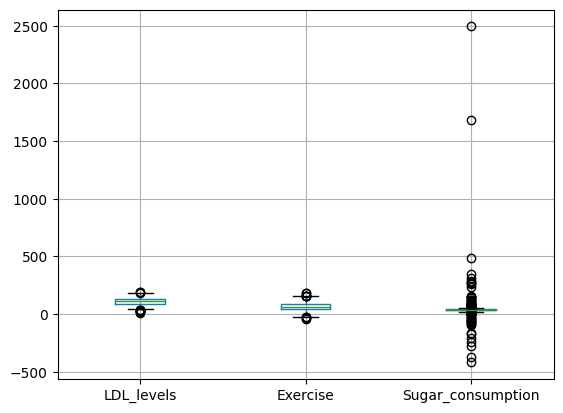

In [7]:
# boxplots of continuous variables distributions
df.boxplot()

The plot represents the distribution of the numerical values as boxplots. Notably, the boolean variable `High_LDL_levels` is included as well. If you prefer to only keep the numerical variables, you can specify the columns to plot:

<AxesSubplot:>

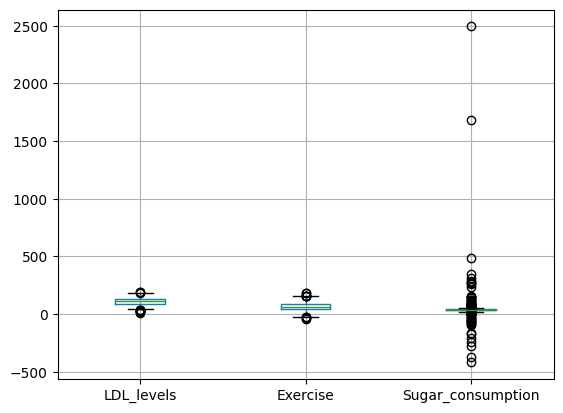

In [8]:
# boxplots only for selected variables
df.boxplot(column = ['LDL_levels', 'Exercise', 'Sugar_consumption'])

We immediately notice that both the `Exercise` and `Sugar_consumption` variables recorded negative value, however this should not theoretically possible. This means that those values are probably typos, and should be set to NaN.

NaN values are not defined in pandas, but they are defined in NumPy. Data frame columns are actually implemented upon NumPy arrays, so we can safely use NumPy NaN values inside pandas data frames:

<AxesSubplot:>

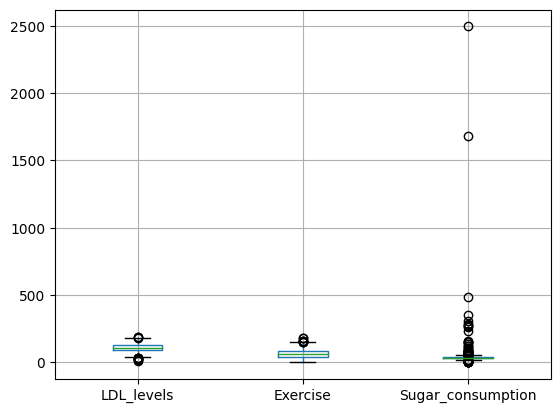

In [9]:
# import NumPy
import numpy as np

# replacing negative values with NaN
df.loc[df.Exercise < 0, 'Exercise'] = np.NaN
df.loc[df.Sugar_consumption < 0, 'Sugar_consumption'] = np.NaN

# visualizing boxplots again
df.boxplot(column = ['LDL_levels', 'Exercise', 'Sugar_consumption'])

All distributions seem now in reasonable ranges. However, you may want to know how many missing values you have inserted:

In [10]:
# counting missing values
df.isna().sum()

LDL_levels            0
Planet                0
Exercise             46
Sugar_consumption    20
dtype: int64

Let's dissect the last expression. The `df.isna()` part produces a new data frame with as many cells as the original one. Each cell has value `True` if the original cell contains a missing value, and `False` otherwise. The `.sum()` part sum all values across each column, in our case producing the number of missing values for each column.

We now want to replace these missing values with some other suitable value. A common choice is using the average value of each column for replacing the missing values in the column itself. The pandas package provides the `fillna` function, which takes one value for each column, and uses this value for replacing the missing values.

Since we have missing values only in the numerical variables, we will focus on them. Let's start by computing the average values

In [11]:
# selecting only numerical variables
tmp_df = df.select_dtypes(include = 'number')
tmp_df

,LDL_levels,Exercise,Sugar_consumption
Individual,,,
Patient_1,117.084348,35.225465,33.074228
Patient_2,106.295820,86.118299,35.766400
Patient_3,122.064582,75.440539,30.140532
Patient_4,126.171853,39.336172,30.966869
Patient_5,132.882935,23.614529,39.043881
...,...,...,...
Patient_1496,90.586941,70.696798,25.965687
Patient_1497,67.401280,97.889474,37.641569
Patient_1498,120.891409,20.061231,43.162917


In [12]:
# computing average values only for the numerical variables
averages = tmp_df.mean()
averages

LDL_levels           108.594871
Exercise              63.988912
Sugar_consumption     41.074515
dtype: float64

We would now like to explore the composition of the categorical variables as well, meaning `Planet` and `High_LDL_levels`

In [15]:
# distribution of values in the Planet variable 
df.Planet.value_counts()

Earth    781
Venus    719
Name: Planet, dtype: int64

In [16]:
# generating the new column again
high_LDL = df['LDL_levels'] > 120

df['High_LDL_levels'] = high_LDL

# distribution of values in the High_LDL_levels variable 
df.High_LDL_levels.value_counts()

False    1002
True      498
Name: High_LDL_levels, dtype: int64

In [17]:
# joint distribution between Planet and High_LDL_levels
pd.crosstab(df.Planet, df.High_LDL_levels)

High_LDL_levels,False,True
Planet,,
Earth,416,365
Venus,586,133


As we can see, we have quite a large number of subject in each category, so we can safely compute statistics separately by category.

We can start by assessing if there is any difference in sugar consumption according to planet!

In [18]:
# statistics on sugar consumption by planet
df.groupby('Planet').Sugar_consumption.describe()

,count,mean,std,min,25%,50%,75%,max
Planet,,,,,,,,
Earth,769.0,41.653984,63.568513,0.949583,32.240145,36.694328,41.344855,1679.358706
Venus,711.0,40.447775,95.235867,0.833190,31.095308,35.015700,39.147754,2494.292378


Important: the `groupby` method allows to produce results subdivided for the values of a specific categorical variables. In this case we selected the `Planet` variable, and we have separate results for subjects that have performed their exercises on Earth and Venus! This is a very powerful functionality when you want to explore in detaul your data.

Anyway, no difference is evident at a first glance, so let's try with a boxplot. We can see again how useful the `groupby` method is:

Earth         AxesSubplot(0.1,0.15;0.363636x0.75)
Venus    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

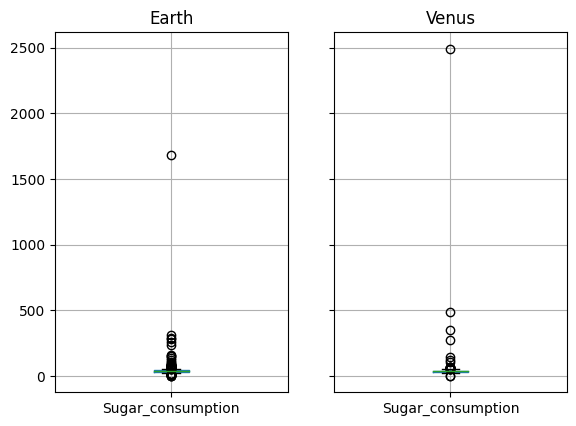

In [19]:
df.groupby('Planet').boxplot(column = 'Sugar_consumption')

The boxplot seems to confirm that there is not difference in how much sugar is consumed, regardless on whether you live on Venus or Earth. Good to know for the future generations that will colonize our celestial neighbour! 

***

In this lesson we have seen how to use a number of methods that allow to explore pandas data frames. Many more methods are available for even more complex analyis: the [official documentation](https://pandas.pydata.org/docs/) is the ideal starting point for learning more on this exciting topic. 